# **Import Libraries**

In [1]:
pip install category_encoders


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


**The dataset includes the following 28 features**:

**ID**: Represents a unique identification of an entry

**Customer_Id**: Represents a unique identification of a person

**Month**: Represents the month of the year

**Name**: Represents the name of a person

**Age**: Represents the age of the person

**SSN**: Represents the social security number of a person

**Occupation**: Represents the occupation of the person

**Annual_Income**: Represents the annual income of the person

**Month_Inhand_Salary**: Represents the monthly base salary of a person

**Num_Bank_Accounts** : Represents the number of bank accounts a person holds

**Num_Credit_Card** : Represents the number of other credit cards held by a person

**Interest_Rate**: Represents the interest rate on credit card

**Num_of_loan**: Represents the number of loans taken from the bank

**Type_of_loan**: Represents the types of loan taken by a person

**Dealy_from_due_date**: Represents the average number of days delayed from the payment date

**Num_of_Delayed_payment**: Represents the average number of payments delayed by a person

**Change_Credit_Limit**: Represents the percentage change in credit card limit

**Num_Credites_Inquiries**: Represents the number of credit card inquiries

**Credit_Mix**: Represents the classification of the mix of credits

**Outstanding_Debt**: Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio**: Represents the utilization ratio of credit card

**Credit_History_Age** : Represents the age of credit history of the person

**Payment_of_Min_Amount** : represents whether only the minimum amount was paid by the person

**Total_EMI_per_month**: Represents the monthly EMI payments (in USD)

**Amount_Invested_Monthly**: Represents the monthly amount invested by the customer (in USD)

**Payment_Behavior**: Represents the payment behavior of the customer (in USD)

**Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)

**Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

# **EDA**

In [3]:
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

<ipython-input-3-ed94fa7a33f1>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv("/content/train.csv")


In [4]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
train_data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [6]:
test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [8]:
train_data.shape

(100000, 28)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [11]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
train_data.duplicated().sum()

0

# **Data Visualization**

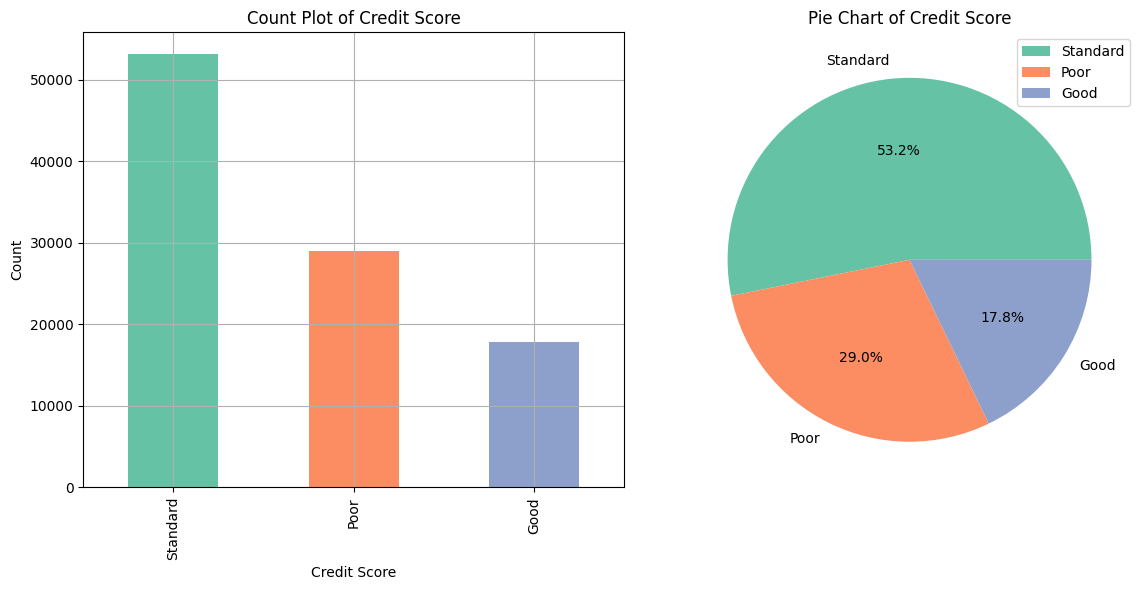

In [13]:
# Get the value counts of the 'Credit_Score' column
Credit_Score_counts = train_data['Credit_Score'].value_counts()

# Set up colors for each category using the "Set2" palette
colors = sns.color_palette("Set2")

# Plot count plot and pie chart
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
Credit_Score_counts.plot(kind='bar', color=colors)
plt.title('Count Plot of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.grid()

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(Credit_Score_counts, labels=Credit_Score_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart of Credit Score')

# Adjust layout
plt.tight_layout()
plt.legend()

# Show plots
plt.show()


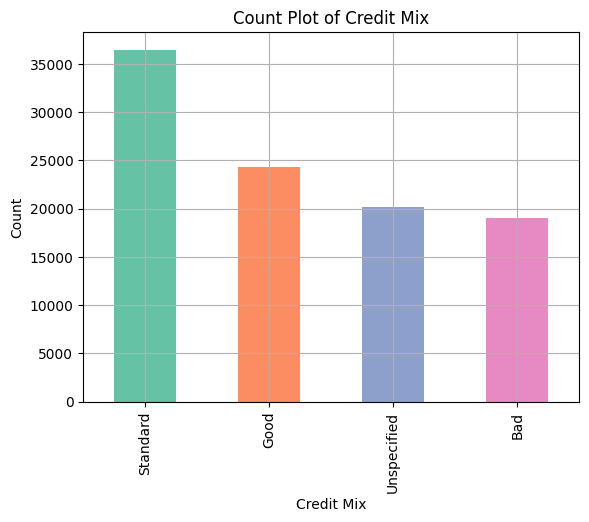

In [14]:

# Get the value counts of the 'Credit_Mix' column
credit_mix_counts = train_data['Credit_Mix'].value_counts()

# Replace "_" with "Unspecified" for clarity
credit_mix_counts = credit_mix_counts.rename(index={'_': 'Unspecified'})

# Set up colors for each category using the "Set2" palette
colors = sns.color_palette("Set2")

# Count plot
ax = credit_mix_counts.plot(kind='bar', color=colors)
plt.title('Count Plot of Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')

plt.grid()



# Show plot
plt.show()


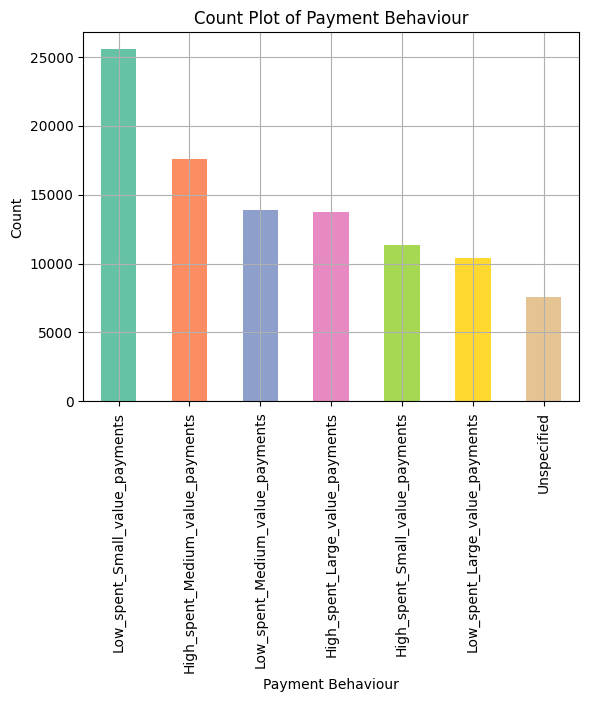

In [15]:

# Get the value counts of the 'Payment_Behaviour' column
Payment_Behaviour_counts = train_data['Payment_Behaviour'].value_counts()

# Replace "!@9#%8" with "Unspecified" for clarity
Payment_Behaviour_counts = Payment_Behaviour_counts.rename(index={'!@9#%8': 'Unspecified'})

# Set up colors for each category using the "Set2" palette
colors = sns.color_palette("Set2")

# Count plot
ax = Payment_Behaviour_counts.plot(kind='bar', color=colors)
plt.title('Count Plot of Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')

plt.grid()



# Show plot
plt.show()


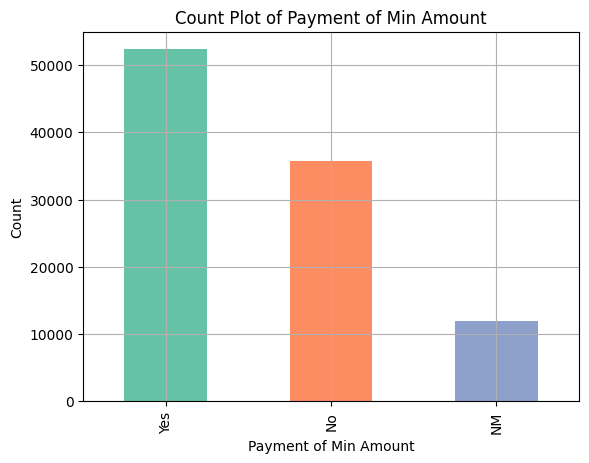

In [16]:
# Get the value counts of the 'Payment_of_Min_Amount' column
Payment_of_Min_Amount_counts = train_data['Payment_of_Min_Amount'].value_counts()

# Set up colors for each category using the "Set2" palette
colors = sns.color_palette("Set2")

# Count plot
ax = Payment_of_Min_Amount_counts.plot(kind='bar', color=colors)
plt.title('Count Plot of Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Count')
plt.grid()

# Show plot
plt.show()


# **Data Preprocessing**

In [17]:
# List of columns to convert
columns_to_convert = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Age'
]

# Convert specified columns from object to float, coercing errors to NaN
train_data[columns_to_convert] = train_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
test_data[columns_to_convert] = test_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display DataFrame information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

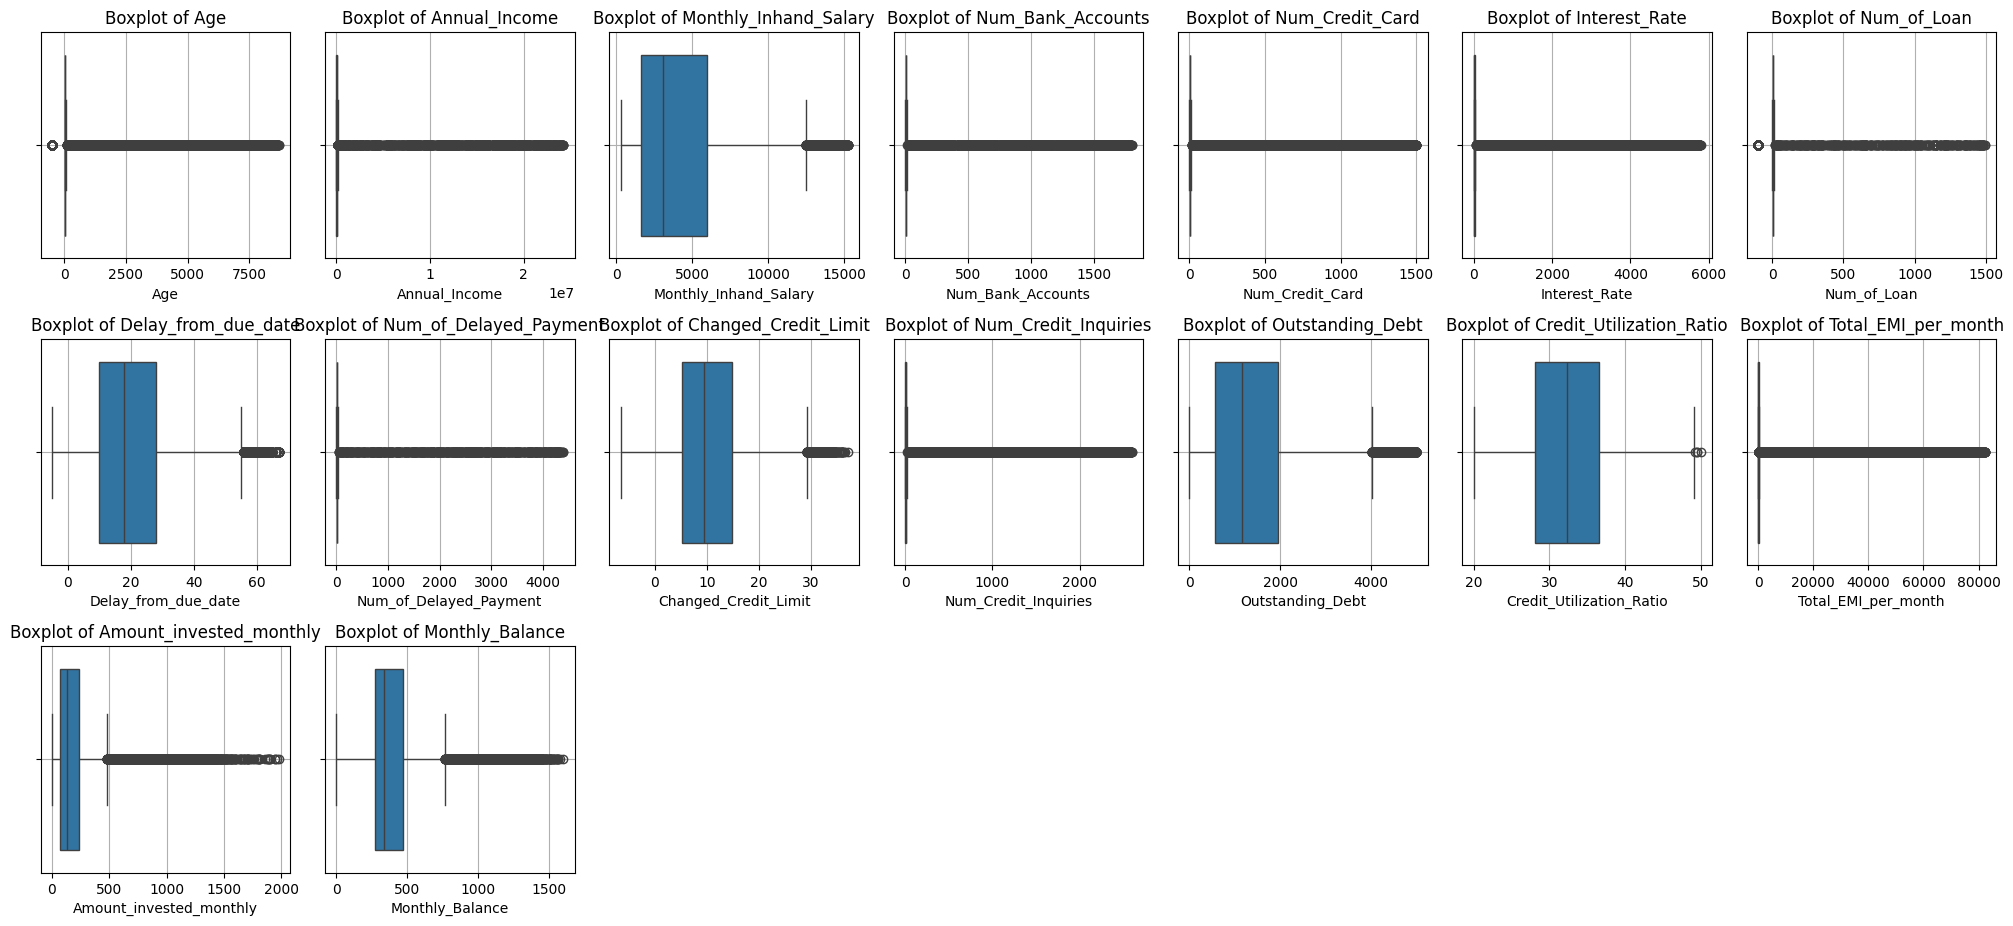

In [18]:
# Select numerical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 7, i)
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


# **Handling Outliers in Numerical Columns**

In [19]:
# Select numerical columns for which you want to check outliers
numerical_cols = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Interest_Rate',
                  'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                  'Total_EMI_per_month','Num_Credit_Card','Amount_invested_monthly','Monthly_Balance']

# Loop through each numerical column
for col in numerical_cols:
    # Calculate the first quartile (Q1)
    Q1 = train_data[col].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = train_data[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the column is within the bounds and assign back to train_data
    train_data = train_data[(train_data[col] >= lower_bound) & (train_data[col] <= upper_bound)]

# Loop through each numerical column
for col in numerical_cols:
    # Calculate the first quartile (Q1)
    Q1 = test_data[col].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = test_data[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the column is within the bounds and assign back to test_data
    test_data = test_data[(test_data[col] >= lower_bound) & (test_data[col] <= upper_bound)]



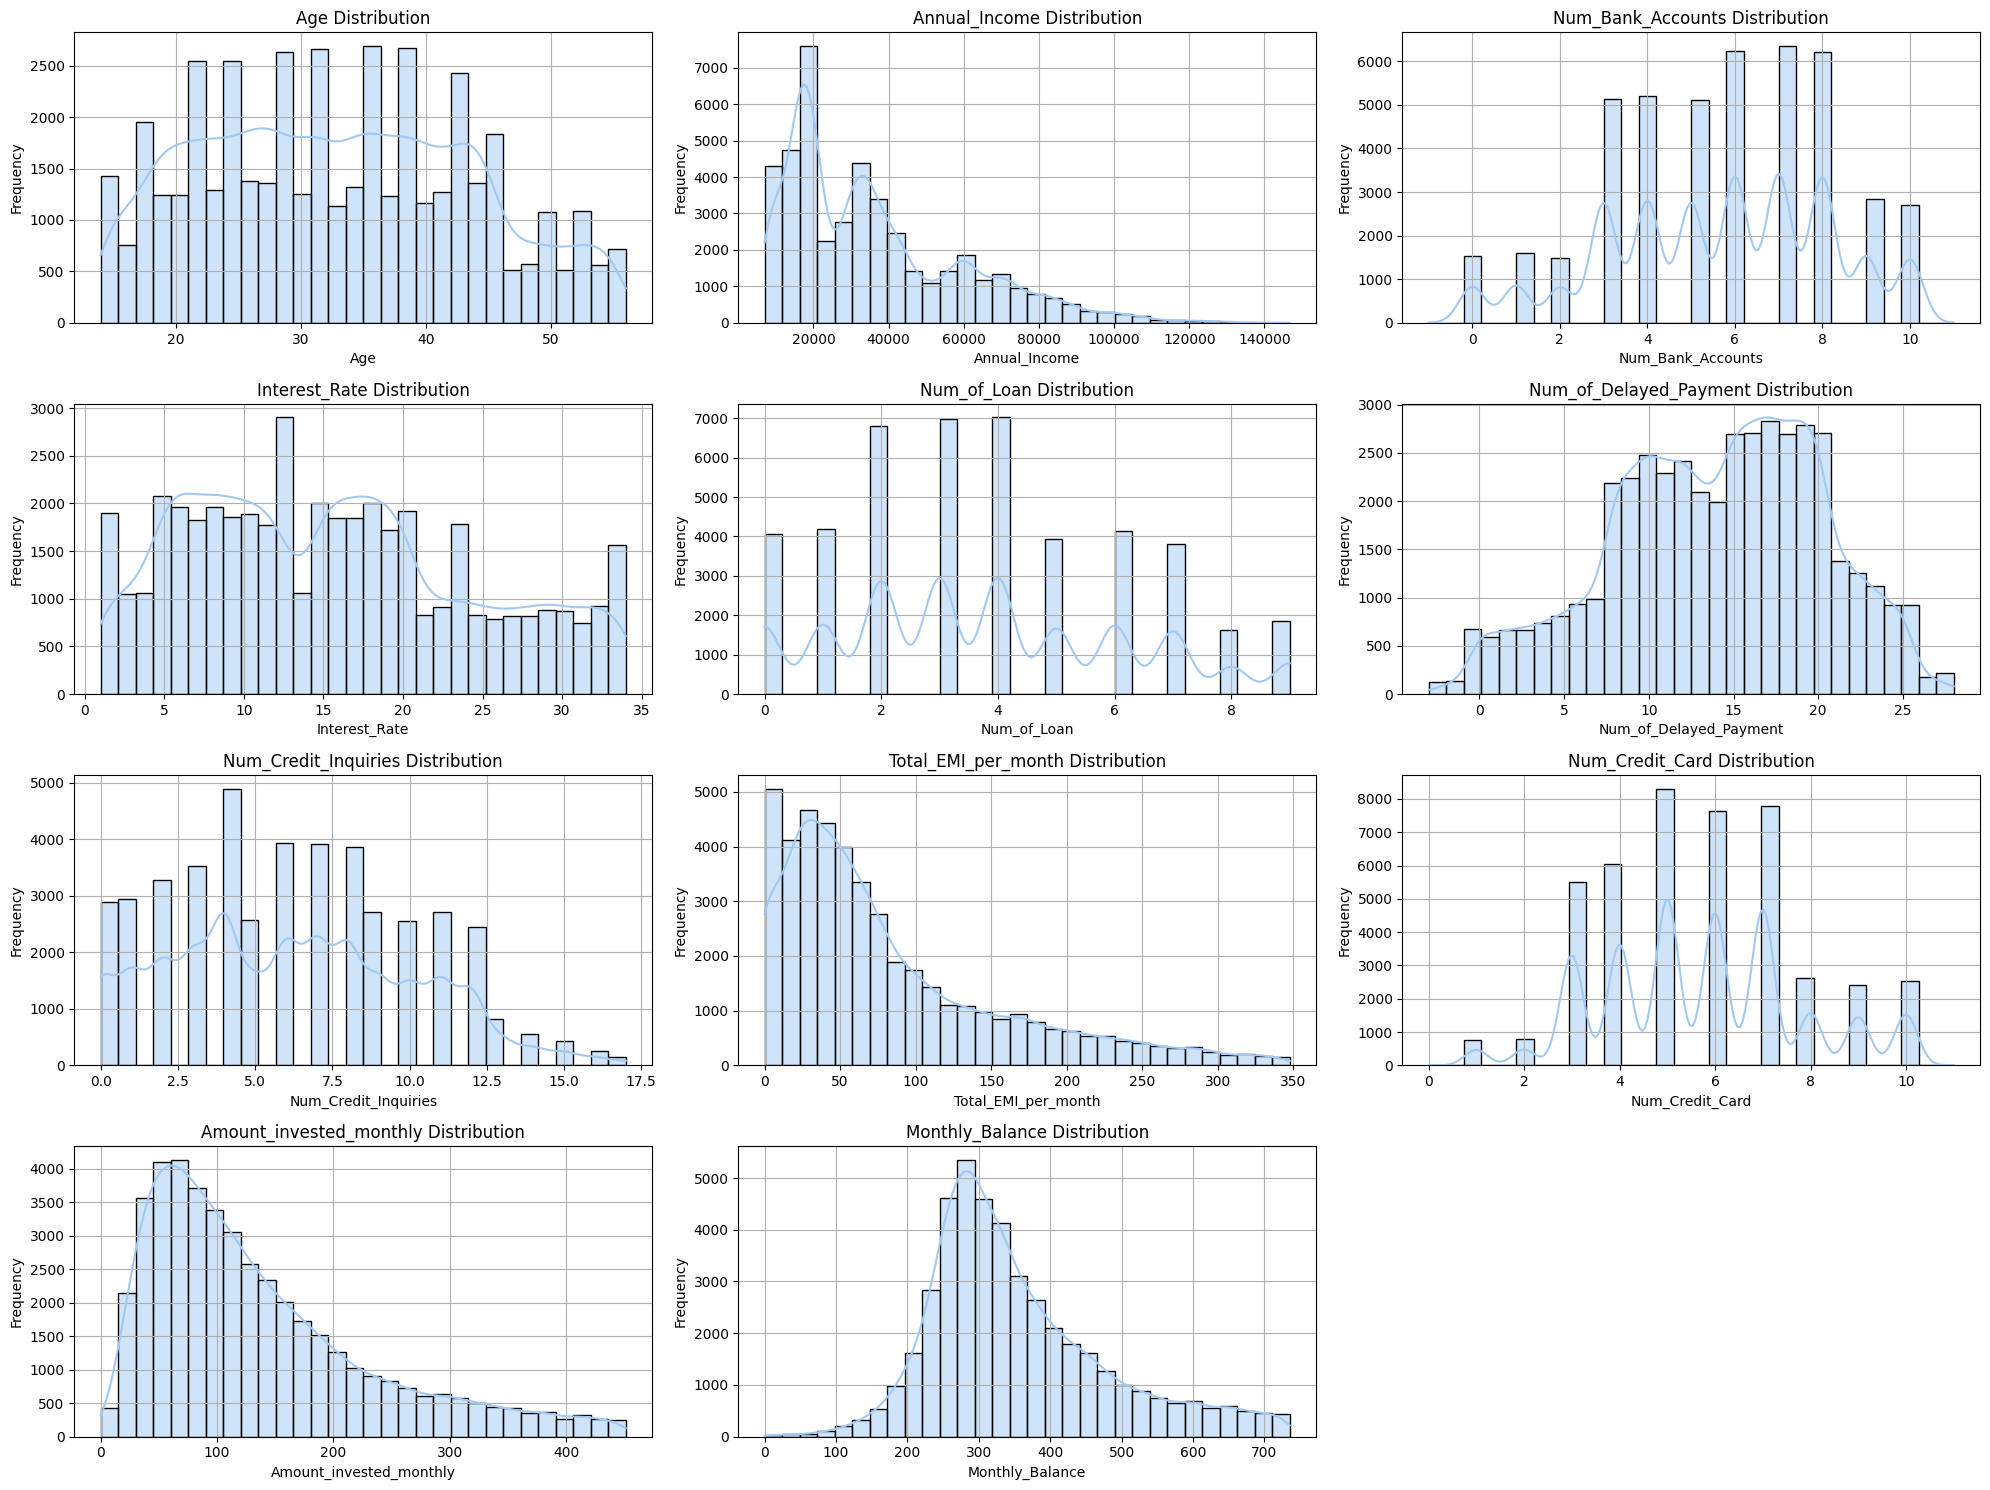

In [20]:
# Set the seaborn style to use pastel colors
sns.set_palette("pastel")

# Create histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=train_data, x=col, bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
# Fill null values with the mean for numerical columns
numeric_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                 'Amount_invested_monthly', 'Monthly_Balance']

for col in numeric_cols:
    train_data[col].fillna(train_data[col].mean(), inplace=True)
    test_data[col].fillna(test_data[col].mean(), inplace=True)

# Fill null values with the most frequent value (mode) for categorical columns
categorical_cols = ['Credit_History_Age', 'Type_of_Loan']

for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# **Dropping the Unncessary columns**

In [22]:
# List of columns to delete
columns_to_delete = ['ID', 'Customer_ID',  'Name', 'SSN', 'Month','Occupation','Credit_History_Age']

# Drop the specified columns
train_data.drop(columns=columns_to_delete, inplace=True)
test_data.drop(columns=columns_to_delete, inplace=True)

In [23]:
# Define mapping for target column
target_mapping = {'Standard': 0, 'Poor': 1, 'Good': 2}

# Map the target column to numeric values
train_data['Credit_Score'] = train_data['Credit_Score'].map(target_mapping)


# **Encoding the categorical Features**

In [24]:
# List of original categorical columns
original_categorical_cols = [
    'Type_of_Loan',
    'Credit_Mix',

    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

# Initialize the TargetEncoder
target_encoder = ce.TargetEncoder(cols=original_categorical_cols)

# Fit and transform the training data
train_data_encoded = target_encoder.fit_transform(train_data[original_categorical_cols], train_data['Credit_Score'])

# Transform the test data using the fitted encoder
test_data_encoded = target_encoder.transform(test_data[original_categorical_cols])

# Drop the original categorical columns from both training and test data
train_data = train_data.drop(original_categorical_cols, axis=1)
test_data = test_data.drop(original_categorical_cols, axis=1)

# Concatenate the original data with the encoded features for both training and test data
train_data_encoded = pd.concat([train_data, train_data_encoded], axis=1)
test_data_encoded = pd.concat([test_data, test_data_encoded], axis=1)


In [25]:
import pickle
# Save the fitted encoder
encoder_path = r"C:\Users\dinai\Downloads\Credit_Score_Prediction\target_encoder.pkl"
with open(encoder_path, 'wb') as encoder_file:
    pickle.dump(target_encoder, encoder_file)

In [26]:
# Fill null values with the mean for numerical columns
numeric_cols = ['Changed_Credit_Limit', 'Outstanding_Debt']

for col in numeric_cols:
    train_data_encoded[col].fillna(train_data_encoded[col].mean(), inplace=True)
    test_data_encoded[col].fillna(test_data_encoded[col].mean(), inplace=True)

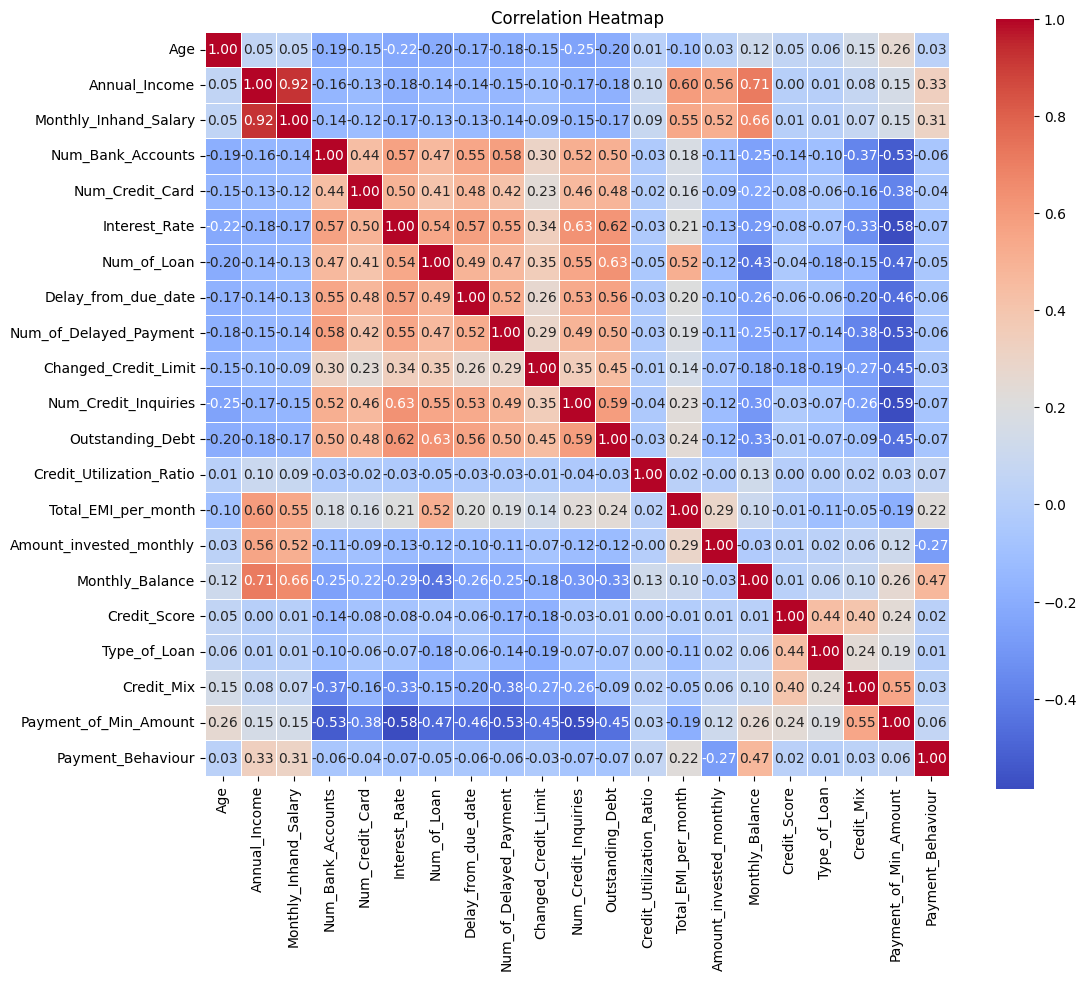

In [27]:
# Calculate the correlation matrix
corr_matrix = train_data_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [28]:
X=train_data_encoded.drop(columns='Credit_Score',axis=1)
y=train_data_encoded['Credit_Score']

# **Standardize Features Using StandardScaler**

In [29]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)

# Transform the test data
test_data_scaled = scaler.transform(test_data_encoded)


In [30]:
# Save the fitted  scaler

scaler_path = r"C:\Users\dinai\Downloads\Credit_Score_Prediction\scaler.pkl"

with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [31]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (35547, 20)
Shape of X_val: (8887, 20)
Shape of y_train: (35547,)
Shape of y_val: (8887,)


# **Apply SMOTE to Balance Training Data**

In [32]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Modeling**

In [33]:
# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost = XGBClassifier()

# Train and evaluate each model
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'KNN': knn,
    'Naive Bayes': naive_bayes,
    'XGBoost': xgboost
}

# Store accuracies
accuracies_train = {}
accuracies_val = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the training set
    y_train_pred = model.predict(X_train_resampled)
    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy on the training set
    accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
    # Calculate accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)

    accuracies_train[name] = accuracy_train
    accuracies_val[name] = accuracy_val

    print(f'{name}: Train Accuracy = {accuracy_train}, Validation Accuracy = {accuracy_val}')


Logistic Regression: Train Accuracy = 0.7382576358413084, Validation Accuracy = 0.7066501631596714
Random Forest: Train Accuracy = 1.0, Validation Accuracy = 0.814673118037583
KNN: Train Accuracy = 0.8919614374592432, Validation Accuracy = 0.7332058062338247
Naive Bayes: Train Accuracy = 0.7123671548670227, Validation Accuracy = 0.6428491054349049
XGBoost: Train Accuracy = 0.9224343044466768, Validation Accuracy = 0.8102846854956678


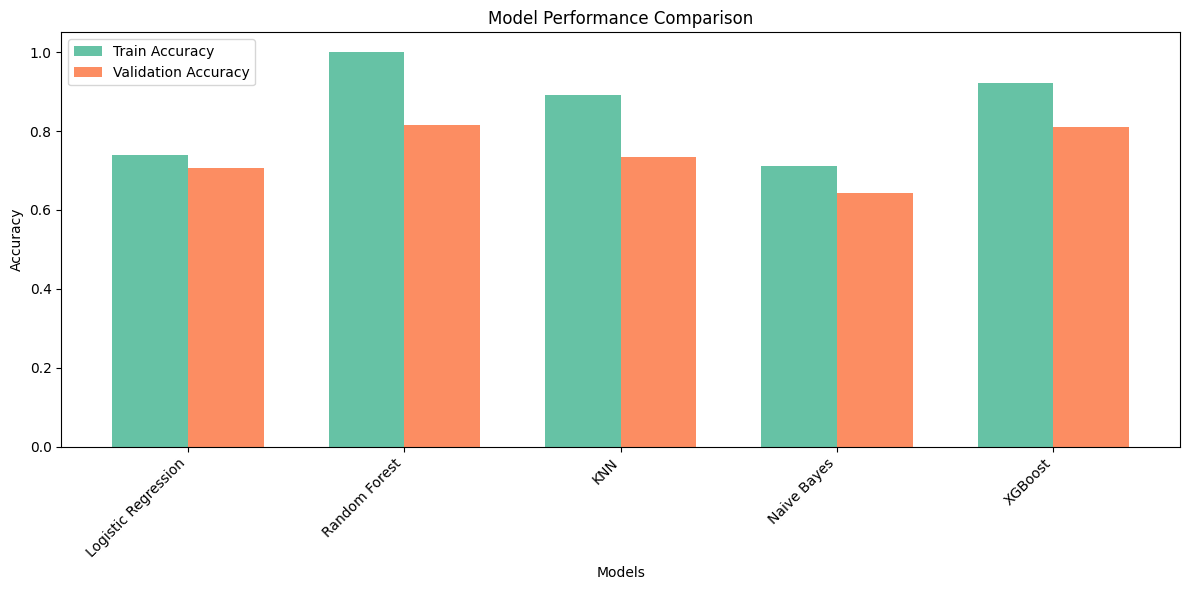

In [34]:
# Extract model names and accuracies
model_names = list(models.keys())
train_accuracies = list(accuracies_train.values())
val_accuracies = list(accuracies_val.values())

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
positions_train = np.arange(len(model_names))
positions_val = positions_train + bar_width

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(positions_train, train_accuracies, width=bar_width, color=sns.color_palette("Set2")[0], label='Train Accuracy')
plt.bar(positions_val, val_accuracies, width=bar_width, color=sns.color_palette("Set2")[1], label='Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(positions_train + bar_width / 2, model_names, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **Hyperparameter tuning for the best models**

In [35]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42,min_samples_split=2,min_samples_leaf=2,max_features='log2',max_depth=20)
# Fit the model
rf.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_train_pred = rf.predict(X_train_resampled)
y_val_pred = rf.predict(X_val)
y_pred=rf.predict(test_data_scaled)
# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
rf_val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Train Accuracy: {rf_train_accuracy:.4f}')
print(f'Validation Accuracy: {rf_val_accuracy:.4f}')

# Calculate precision, recall, and F1 score for training data
rf_train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
rf_train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
rf_train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate precision, recall, and F1 score for validation data
rf_val_precision = precision_score(y_val, y_val_pred, average='weighted')
rf_val_recall = recall_score(y_val, y_val_pred, average='weighted')
rf_val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print precision, recall, and F1 score
print(f'Train Precision: {rf_train_precision:.4f}')
print(f'Train Recall: {rf_train_recall:.4f}')
print(f'Train F1 Score: {rf_train_f1:.4f}')

print(f'Validation Precision: {rf_val_precision:.4f}')
print(f'Validation Recall: {rf_val_recall:.4f}')
print(f'Validation F1 Score: {rf_val_f1:.4f}')

Train Accuracy: 0.9564
Validation Accuracy: 0.8119
Train Precision: 0.9574
Train Recall: 0.9564
Train F1 Score: 0.9562
Validation Precision: 0.8195
Validation Recall: 0.8119
Validation F1 Score: 0.8133


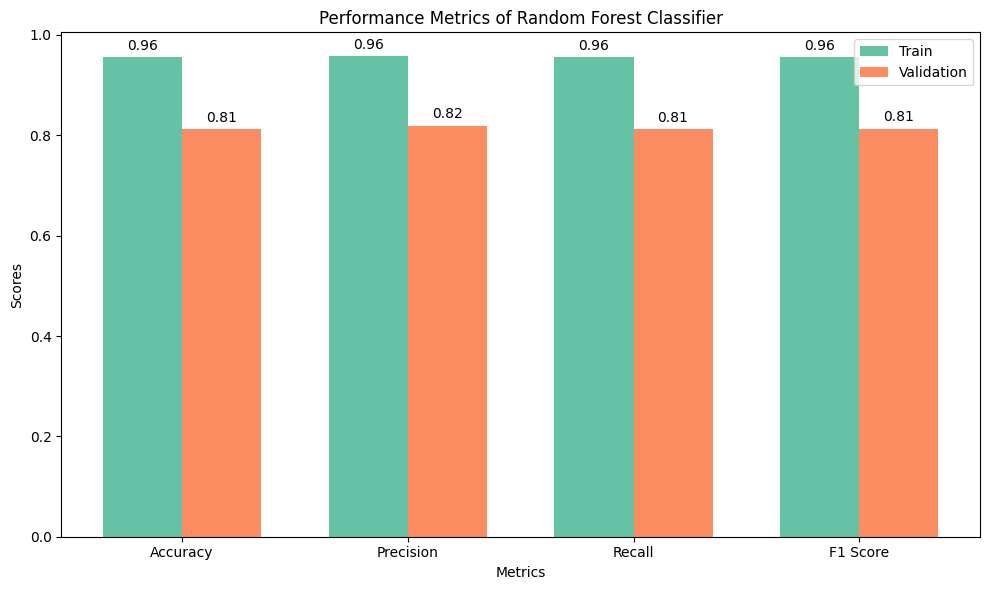

In [36]:
# Calculate metrics
metrics = {
    'Accuracy': [rf_train_accuracy, rf_val_accuracy],
    'Precision': [rf_train_precision, rf_val_precision],
    'Recall': [rf_train_recall, rf_val_recall],
    'F1 Score': [rf_train_f1, rf_val_f1]
}

# Convert metrics dictionary to lists for plotting
metric_names = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in metric_names]
val_metrics = [metrics[metric][1] for metric in metric_names]

# Plotting
x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Set the Seaborn color palette to Set2
colors = sns.color_palette("Set2", 2)

# Create bars
bars1 = ax.bar(x - width/2, train_metrics, width, label='Train', color=colors[0])
bars2 = ax.bar(x + width/2, val_metrics, width, label='Validation', color=colors[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Random Forest Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()


In [37]:
# Initialize the XGBoost Classifier with regularization parameters
xgb = XGBClassifier(
    random_state=42,
    max_depth=6,
    min_child_weight=1,
    gamma=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1
)

# Fit the model
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = xgb.predict(X_train_resampled)
y_val_pred = xgb.predict(X_val)
y_pred=xgb.predict(test_data_scaled)

# Calculate accuracy
xgb_train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
xgb_val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Train Accuracy: {xgb_train_accuracy:.4f}')
print(f'Validation Accuracy: {xgb_val_accuracy:.4f}')

# Calculate precision, recall, and F1 score for training data
xgb_train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
xgb_train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
xgb_train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate precision, recall, and F1 score for validation data
xgb_val_precision = precision_score(y_val, y_val_pred, average='weighted')
xgb_val_recall = recall_score(y_val, y_val_pred, average='weighted')
xgb_val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print precision, recall, and F1 score
print(f'Train Precision: {xgb_train_precision:.4f}')
print(f'Train Recall: {xgb_train_recall:.4f}')
print(f'Train F1 Score: {xgb_train_f1:.4f}')

print(f'Validation Precision: {xgb_val_precision:.4f}')
print(f'Validation Recall: {xgb_val_recall:.4f}')
print(f'Validation F1 Score: {xgb_val_f1:.4f}')


Train Accuracy: 0.9281
Validation Accuracy: 0.8071
Train Precision: 0.9279
Train Recall: 0.9281
Train F1 Score: 0.9279
Validation Precision: 0.8084
Validation Recall: 0.8071
Validation F1 Score: 0.8076


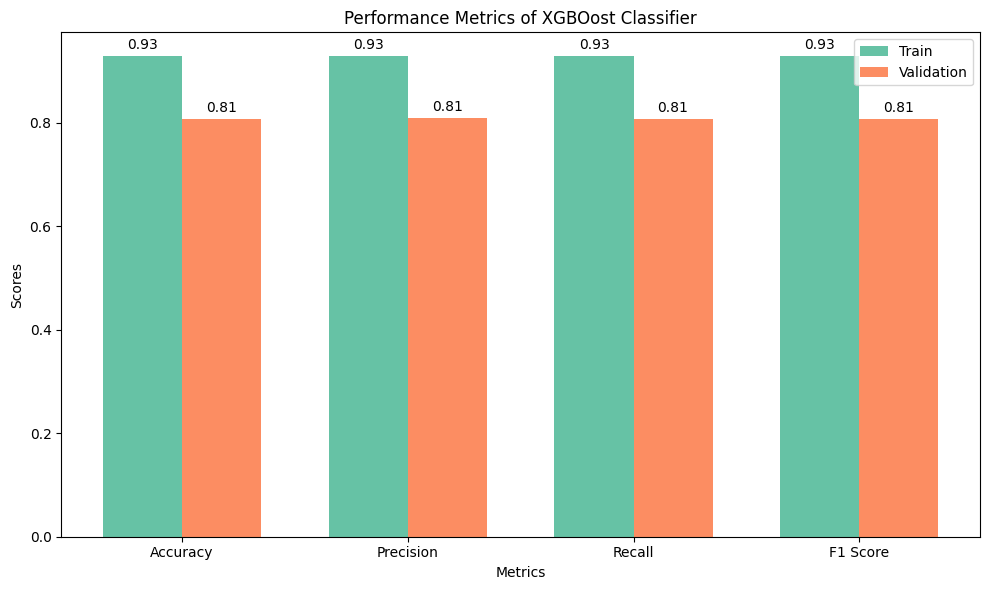

In [38]:
# Calculate metrics
metrics = {
    'Accuracy': [xgb_train_accuracy, xgb_val_accuracy],
    'Precision': [xgb_train_precision, xgb_val_precision],
    'Recall': [xgb_train_recall, xgb_val_recall],
    'F1 Score': [xgb_train_f1, xgb_val_f1]
}

# Convert metrics dictionary to lists for plotting
metric_names = list(metrics.keys())
train_metrics = [metrics[metric][0] for metric in metric_names]
val_metrics = [metrics[metric][1] for metric in metric_names]

# Plotting
x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Set the Seaborn color palette to Set2
colors = sns.color_palette("Set2", 2)

# Create bars
bars1 = ax.bar(x - width/2, train_metrics, width, label='Train', color=colors[0])
bars2 = ax.bar(x + width/2, val_metrics, width, label='Validation', color=colors[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of XGBOost Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()


# **Save the trained model as a pickle file**

In [39]:
from google.colab import drive
import joblib

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the path in your Google Drive where you want to save the model
file_path = '/content/drive/My Drive/xgboost_model.pkl'

# Save the trained model as a pickle file
joblib.dump(xgb, file_path)


Mounted at /content/drive


['/content/drive/My Drive/xgboost_model.pkl']